In [1]:
import os
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
os.chdir(r"C:\Users\mehul\Time_Series_Analysis")
from predictions import *

In [2]:
df_rp = predictions("ripple_price.csv")
df_rp.data = df_rp.data.reindex(index=df_rp.data.index[::-1])

                Open      High       Low     Close Volume   Market Cap  \
2013-08-04  0.005874  0.005927  0.005874  0.005882      -  4,59,21,000   
2013-08-05  0.005875  0.005980  0.005613  0.005613      -  4,59,28,400   
2013-08-06  0.005637  0.005661  0.004629  0.004680      -  4,40,67,600   
2013-08-07  0.004669  0.004682  0.004333  0.004417      -  3,65,03,500   
2013-08-08  0.004397  0.004424  0.004175  0.004254      -  3,43,72,500   

                Mean  
2013-08-04  0.005889  
2013-08-05  0.005770  
2013-08-06  0.005152  
2013-08-07  0.004525  
2013-08-08  0.004313  
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1662 entries, 2013-08-04 to 2018-02-20
Freq: D
Data columns (total 7 columns):
Open          1662 non-null float64
High          1662 non-null float64
Low           1662 non-null float64
Close         1662 non-null float64
Volume        1662 non-null object
Market Cap    1662 non-null object
Mean   

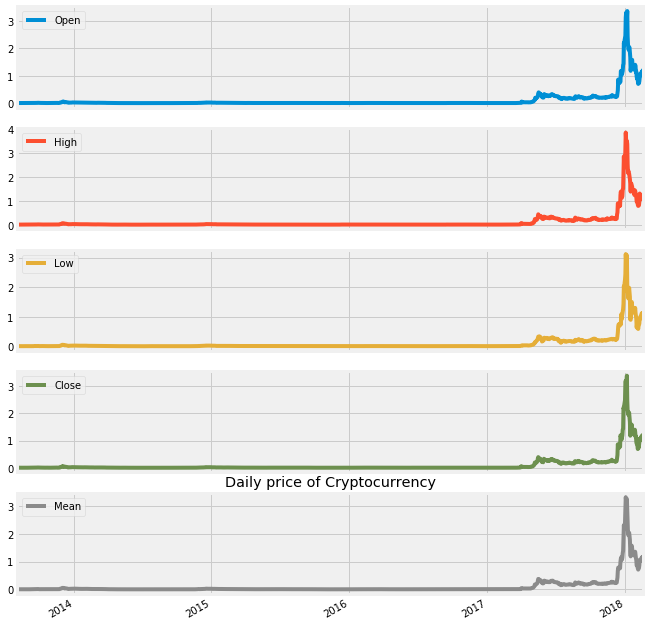

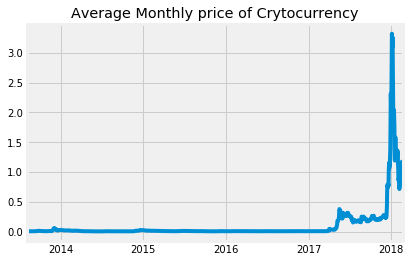

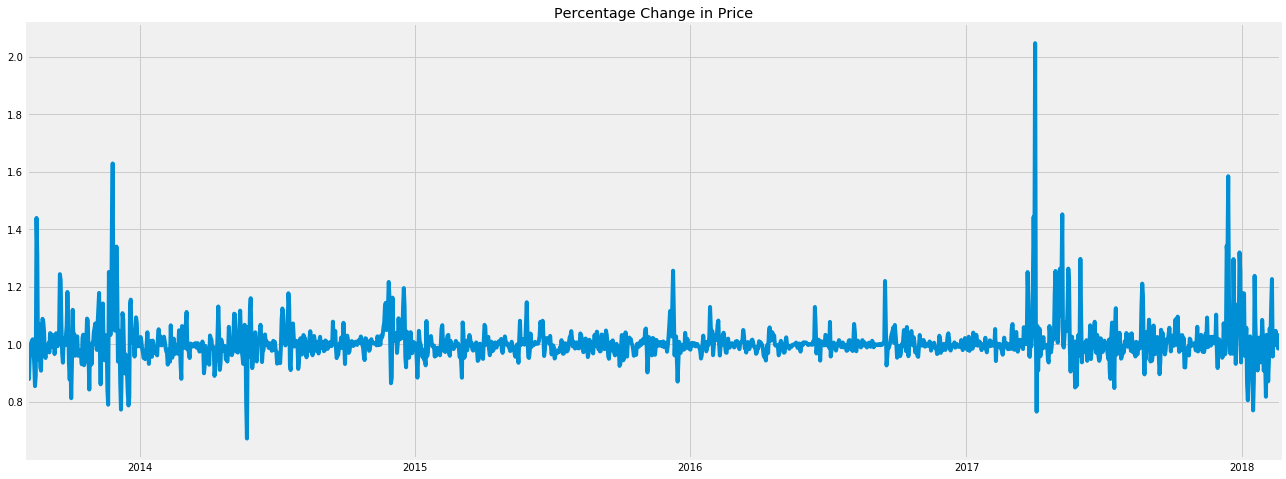

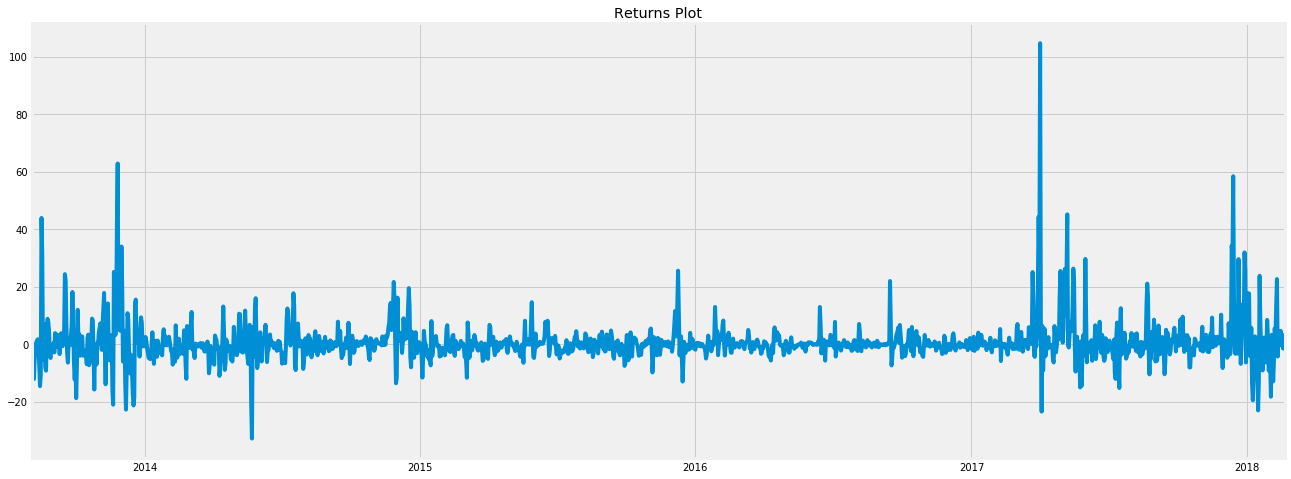

C:\Users\mehul\Time_Series_Analysis\predictions.py:59: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolmean = self.data.Mean.rolling(30).mean()
C:\Users\mehul\Time_Series_Analysis\predictions.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolstd = self.data.Mean.rolling(30).std()


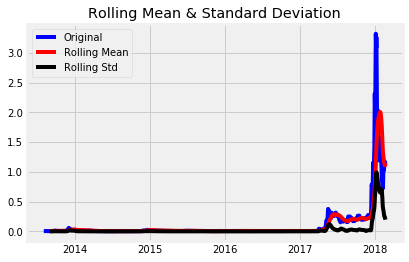

Results of Dickey-Fuller Test
Test Statistic                   -2.570481
p-value                           0.099253
#Lags Used                       24.000000
Number of Observations Used    1637.000000
Critical Value(1%)               -3.434351
Critical Value(5%)               -2.863307
Critical Value(10%)              -2.567711
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            1.507236
p-value                   0.010000
Lags Used                25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.820
P-value                         0.055
Lags                               25
-----------------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [3]:
df_rp.description()
df_rp.missing()
df_rp.plot_daily()
df_rp.plot_monthly()
df_rp.Percent_change()
df_rp.Returns()
df_rp.stationarity_test()

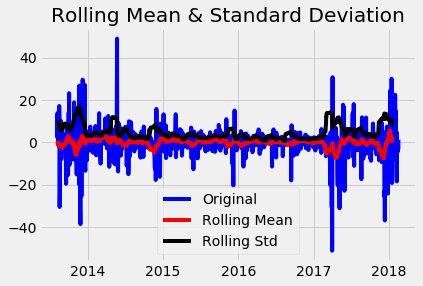

Results of Dickey-Fuller Test
Test Statistic                -1.028188e+01
p-value                        3.761107e-18
#Lags Used                     1.200000e+01
Number of Observations Used    1.648000e+03
Critical Value(1%)            -3.434324e+00
Critical Value(5%)            -2.863295e+00
Critical Value(10%)           -2.567705e+00
dtype: float64
Results of KPSS Test:
------------------------------------------------------------------------------
Test Statistic            0.283388
p-value                   0.100000
Lags Used                25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [5]:
from Model import *
rp_ret = model(df_rp.data)
rp_ret.stationarity_test()

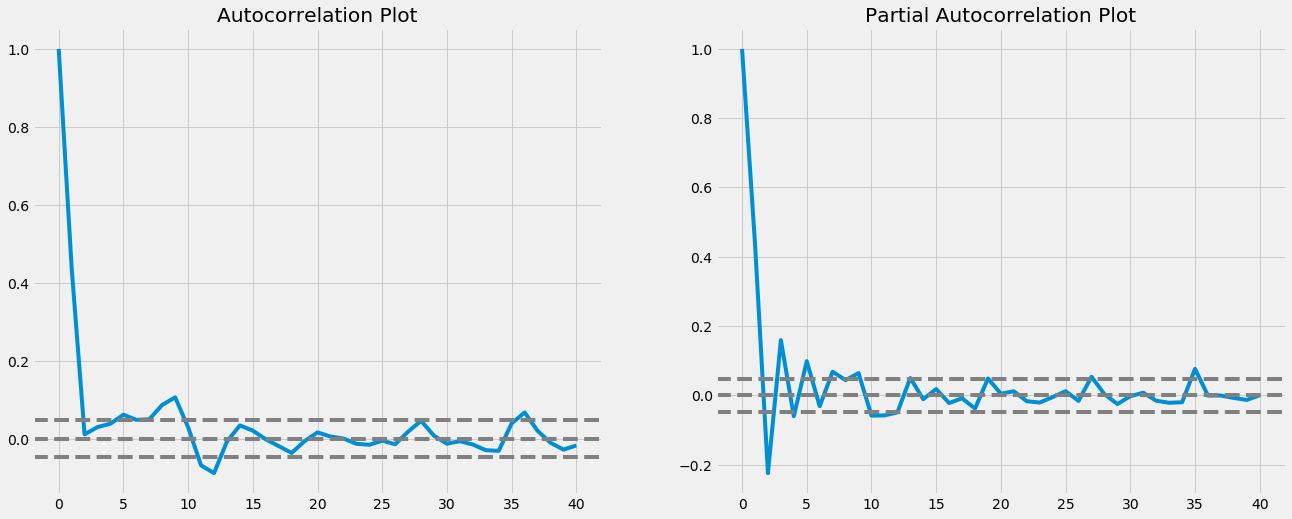

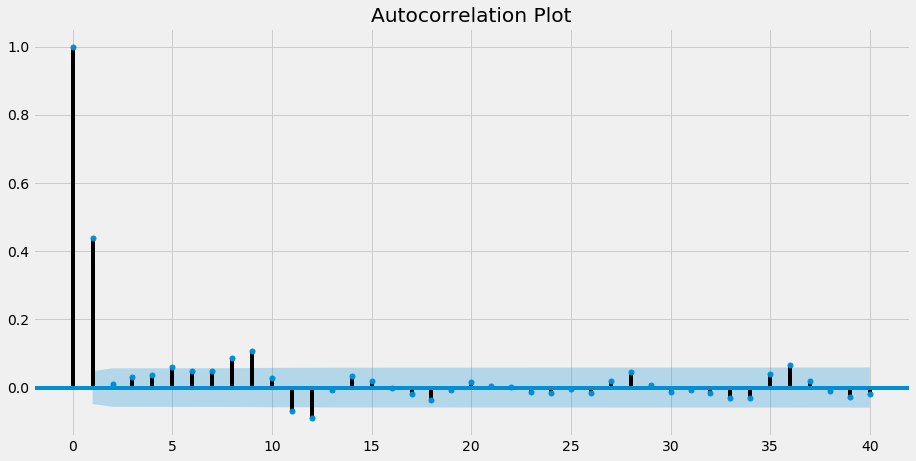

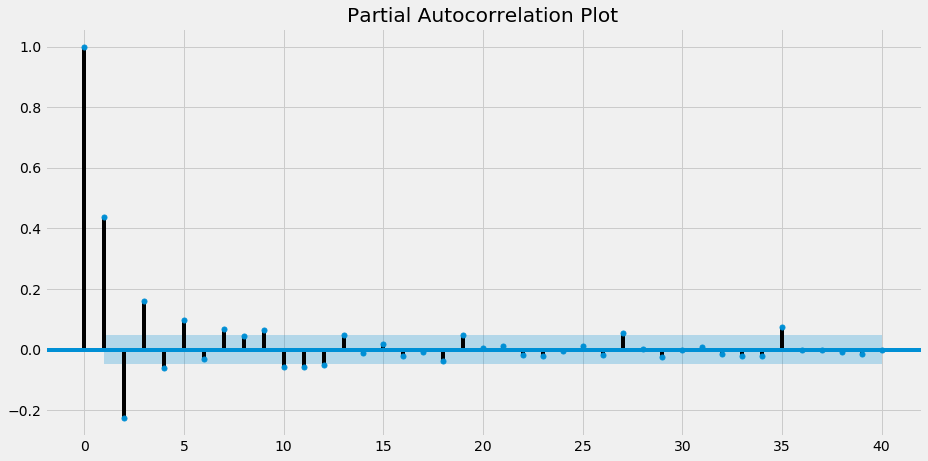

In [6]:
rp_ret.lags()
rp_ret.auto_graphics()
rp_ret.partial_graphics()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                           Results: ARMA
Model:              ARMA             BIC:                 10181.3057
Dependent Variable: Returns          Log-Likelihood:      -5075.8   
Date:               2019-10-18 18:07 Scale:               1.0000    
No. Observations:   1661             Method:              css-mle   
Df Model:           3                Sample:              02-19-2018
Df Residuals:       1658                                  08-04-2013
Converged:          1.0000           S.D. of innovations: 5.139     
No. Iterations:     9.0000           HQIC:                10167.673 
AIC:                10159.6450                                      
---------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
---------------------------------------------------------------------
const             -0.1253    0.1977  -0.6338  0.5263  -0.5128  0.2622
ar.L1.Returns     -0.0475    0.0432  -1.0996  0.2717  -0.1

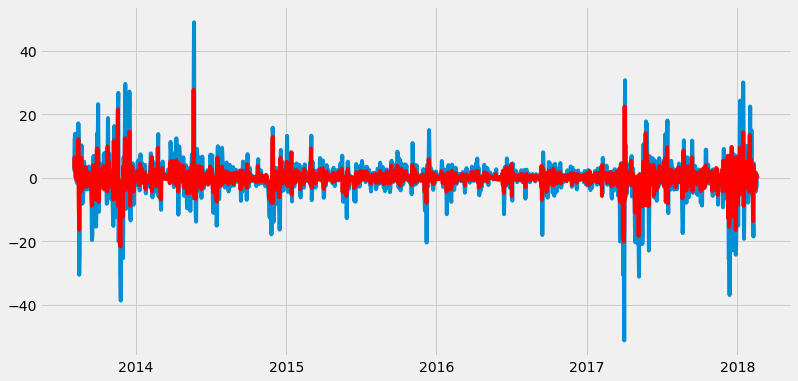

In [7]:
rp_ret.ARIMA_model(1,1)
rp_ret.plot_predict()

In [4]:
df_rp.data = df_rp.data['2017-01-01':]

In [7]:
from produce_predict import *
#This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” 
#to find the optimal set of parameters that yields the best performance for our model.
rp_sarima = produce_predict(df_rp.data)

In [8]:
rp_sarima.order()

ARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:845.5241057039193
ARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:696.9813786804475
ARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:711.2960752049835
ARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:603.6901895905004
ARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:659.4583471115516
ARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:568.9518468263361
ARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:602.4247720145027


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC:604.2615237541199
ARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC:290.9398381119329
ARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC:184.8741153030927
ARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC:199.2261198906994
ARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:130.46629914579523
ARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC:146.15368549713713
ARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC:62.65081911627476
ARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC:129.21094896888903
ARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC:131.34678932844585
ARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC:-970.305457936184
ARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC:-869.6777293341535
ARIMA(0, 1, 0)x(0, 1, 0, 30) - AIC:-603.585818906686
ARIMA(0, 1, 0)x(0, 1, 1, 30) - AIC:-741.1566758685599
ARIMA(0, 1, 0)x(1, 0, 0, 30) - AIC:-873.020871323209
ARIMA(0, 1, 0)x(1, 0, 1, 30) - AIC:-867.7444232601564
ARIMA(0, 1, 0)x(1, 1, 0, 30) - AIC:-748.5565623827436
ARIMA(0, 1, 0)x(1, 1, 1, 30) - AIC:-757.1456673448799
ARIMA(0, 1, 1)x(0, 0, 0, 30) - AIC:-1078.5717285608266
ARIMA(0, 1, 1)x(0, 0, 1, 30) - AIC:

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 30) - AIC:-869.1869314703167
ARIMA(1, 0, 0)x(0, 1, 0, 30) - AIC:-607.1571250640949
ARIMA(1, 0, 0)x(0, 1, 1, 30) - AIC:-743.1719484586691
ARIMA(1, 0, 0)x(1, 0, 0, 30) - AIC:-871.1956344875314
ARIMA(1, 0, 0)x(1, 0, 1, 30) - AIC:-869.1959804293917
ARIMA(1, 0, 0)x(1, 1, 0, 30) - AIC:-748.295070929687


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 30) - AIC:-743.5288258595292
ARIMA(1, 0, 1)x(0, 0, 0, 30) - AIC:-1081.223996317971


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 30) - AIC:-971.3314619727353


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 30) - AIC:-739.0675428673183


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 30) - AIC:-843.894443163575
ARIMA(1, 0, 1)x(1, 0, 0, 30) - AIC:-975.3185951328745
ARIMA(1, 0, 1)x(1, 0, 1, 30) - AIC:-969.7664765105061
ARIMA(1, 0, 1)x(1, 1, 0, 30) - AIC:-854.83989448127


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 30) - AIC:-845.6164153200675
ARIMA(1, 1, 0)x(0, 0, 0, 30) - AIC:-1051.1240916094623
ARIMA(1, 1, 0)x(0, 0, 1, 30) - AIC:-944.0848124925112
ARIMA(1, 1, 0)x(0, 1, 0, 30) - AIC:-711.1163783640084


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 30) - AIC:-816.7761011773996
ARIMA(1, 1, 0)x(1, 0, 0, 30) - AIC:-944.1151632188669
ARIMA(1, 1, 0)x(1, 0, 1, 30) - AIC:-942.1153759081386
ARIMA(1, 1, 0)x(1, 1, 0, 30) - AIC:-819.6146720329361


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 30) - AIC:-827.5484770165023
ARIMA(1, 1, 1)x(0, 0, 0, 30) - AIC:-1078.4882493045898
ARIMA(1, 1, 1)x(0, 0, 1, 30) - AIC:-968.8426037877484


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 30) - AIC:-730.5627092334802
ARIMA(1, 1, 1)x(0, 1, 1, 30) - AIC:-838.5833954687257
ARIMA(1, 1, 1)x(1, 0, 0, 30) - AIC:-972.3631838852516
ARIMA(1, 1, 1)x(1, 0, 1, 30) - AIC:-966.8469180567376
ARIMA(1, 1, 1)x(1, 1, 0, 30) - AIC:-849.0519999102298
ARIMA(1, 1, 1)x(1, 1, 1, 30) - AIC:-853.7098374468386


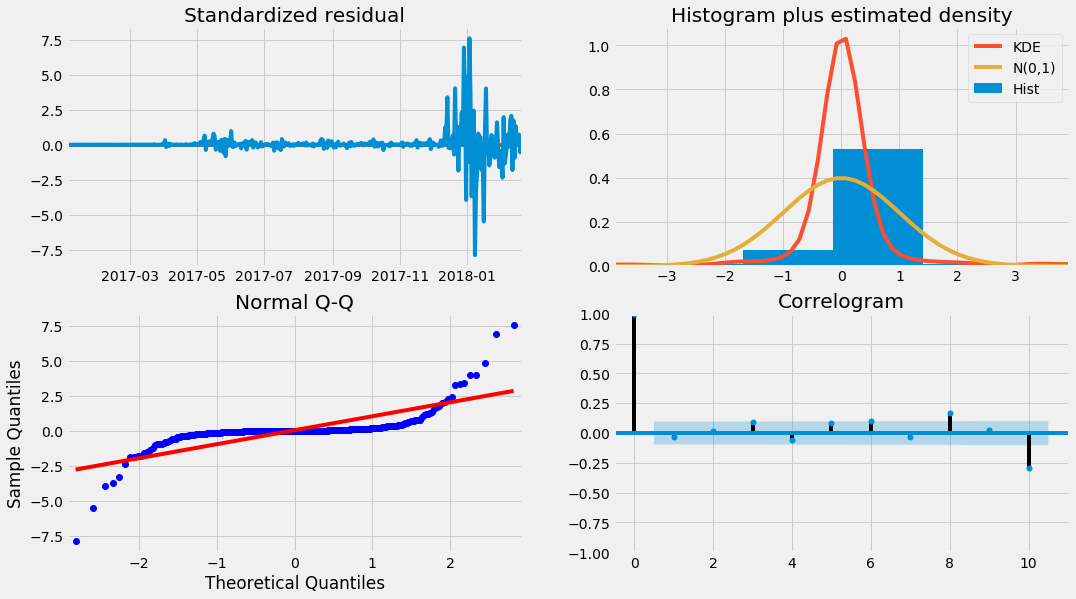

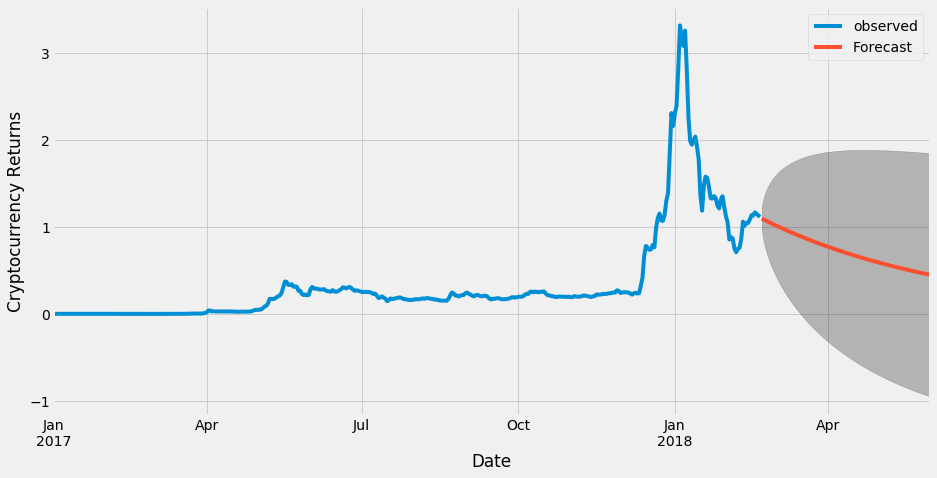

In [9]:
rp_sarima.sarima_model((1,0,1),(0,0,0,30))
rp_sarima.diagnostics()
rp_sarima.produce_forecast()

In [10]:
from fbprophet import Prophet
from prophet_model import *
rp_pro = prophet_model("ripple_price.csv",1246)

<Figure size 1296x432 with 0 Axes>

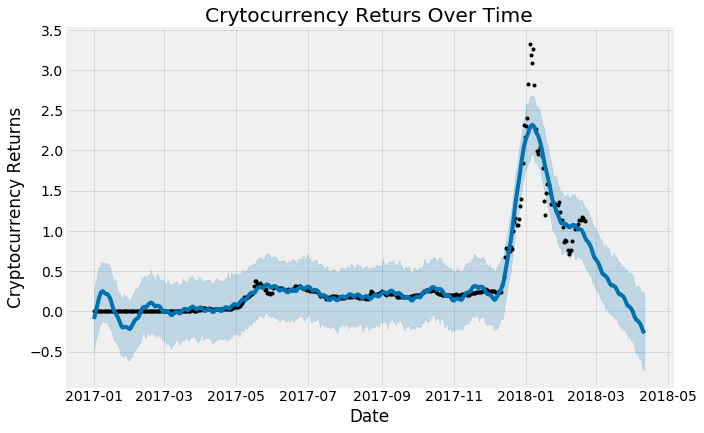

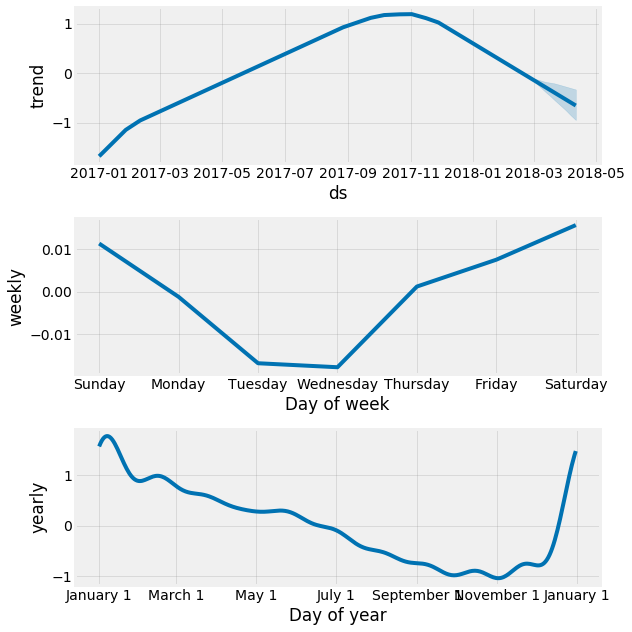

In [11]:
rp_pro.model()
rp_pro.forecast()
rp_pro.Vizualization()

In [5]:
from VaR import *
var = Var(df_rp.data)

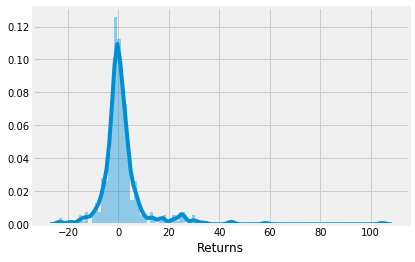

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -11.0455
95%                           -14.6446
99%                           -21.3958


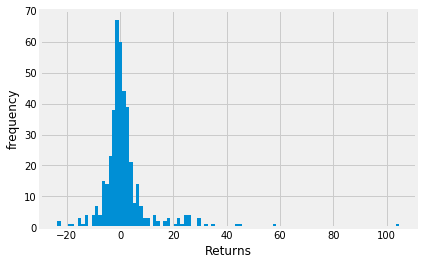

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -5.53753
95%                           -8.31916
99%                          -15.2463


In [6]:
var.var_cov(100)
var.hist_sim(100)

In [7]:
var.monte_carlo()

Simulated VAR is  32.976327555191496
